### The Spark Foundation
#### Task 2 : Prediction using Unsupervised Machine Learning (K-Means Clustering)

#### Author: Emmanuel Mugabo
---
0. Import all the required libraries
1. Reading in the dataset
2. Data Understanding
3. Data Preparation
4. Model Implementation and Prediction
5. Conclusion
---
#### Step 0. Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

print('The libraries are imported successfully.')

The libraries are imported successfully.


#### Step 1. Reading in the dataset
---
We first read in the dataset using `read_csv` from the pandas library

In [2]:
# load the iris dataset
iris_df = pd.read_csv(r"C:\Users\test\Desktop\SPARK INTERNSHIP\iris.csv")

In [3]:
# Displaying the whole dataset
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Displaying the first 5 rows by using head()
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Displaying the last 5 rows by using tail()
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Step 2. Data Understanding

In [6]:
# Check the sample size of the dataset
len(iris_df)

150

In [7]:
# Check the dimension of the dataset 
iris_df.shape

(150, 6)

In [8]:
# View the column names of the dataset
for i, col in enumerate(iris_df.columns):
    print(f'Col. No: {i + 1} is {col}')

Col. No: 1 is Id
Col. No: 2 is SepalLengthCm
Col. No: 3 is SepalWidthCm
Col. No: 4 is PetalLengthCm
Col. No: 5 is PetalWidthCm
Col. No: 6 is Species


In [9]:
# View the data type of each column in the dataset
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
# Viewing more information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
# Describing the dataset as basic statistic
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Step 3: Data Preparation

In [12]:
# Check the irrelevant and missing values, and further c
#cleaning if needed
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# Drop 'Id' feature which is irrelevant as it is not needed 
# to answer our research question
iris_df.drop('Id', axis=1, inplace=True)
# Check if irrelevant feature is deleted
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Step 4: Feature Understanding

In [14]:
# Check the value count of the target feature ('Species')
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- #### Splitting data into training and test dataset

In [15]:
# training dataset
train_data = iris_df.iloc[:,[0, 1, 2, 3]]
train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# test dataset
test_data = iris_df.iloc[:,4]
test_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

- ##### We need to visualize the dataset which we're going to with for the clustering.

K-Means is a centroid-based algorithm or distance-based algorithm where we calculate the distance to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
In this task, the K-Means clustering is adopted, which is a clustering algorithm that aims to partition n observations into k clusters.

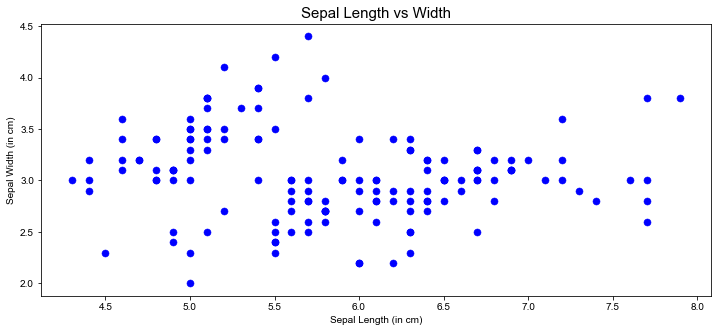

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x = iris_df['SepalLengthCm'], y = iris_df['SepalWidthCm'],
                     s=50, color='blue', edgecolor='blue', linewidth=0.5)
ax.set_xlabel('Sepal Length (in cm)')
ax.set_ylabel('Sepal Width (in cm)')
plt.title('Sepal Length vs Width', fontsize = 15)
plt.show()

- ##### Using the Elbow method to determine the optimal number od clusters for k-means clustering

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the number of clusters (K Value) to figure out the optimal number of clusters value.

In [18]:
# With the below line of code, we get all the Within Cluster Sum Of Square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)
np.array(wcss)

C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

array([680.8244    , 152.36870648,  78.94084143,  57.34540932,
        46.53558205,  38.93096305,  34.31894428,  30.02341636,
        28.04984428,  26.17297042])

We can now visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

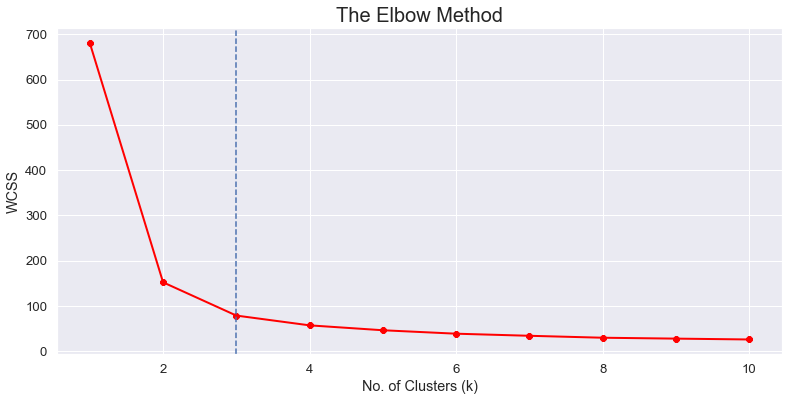

In [19]:
fig, ax = plt.subplots(figsize = (13, 6))
ax = plt.plot(range(1, 11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.axvline(x = 3, ls = '--')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph, we can see that the optimal number of clusters for our dataset is 3, as the last elbow comes at k = 3, and WCSS doesn't decrease significantly after that point.

#### Step 5: Model Implementation and Prediction
- #### K-Means Clustering

In [20]:
# Create the kmeans classifier with n_clusters = 3
kmeans = KMeans(n_clusters = 3, init='k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(train_data)

C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

In [21]:
clusters = train_data.copy()
clusters['Cluster_Prediction'] = kmeans.fit_predict(train_data)
cluster_pred  = clusters['Cluster_Prediction']
clusters.head()

C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [22]:
# Get the centroids of the clusters by using cluster_centers_
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

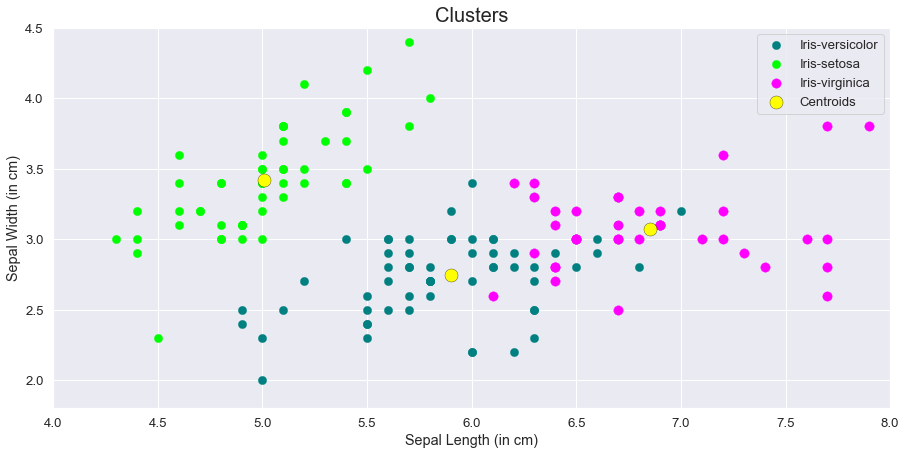

In [23]:
# Let's now visualize our dataset by using scatterplot
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[cluster_pred == 0]['SepalLengthCm'],
            y=clusters[cluster_pred == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[cluster_pred == 1]['SepalLengthCm'],
            y=clusters[cluster_pred == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[cluster_pred == 2]['SepalLengthCm'],
            y=clusters[cluster_pred == 2]['SepalWidthCm'],
            s=90,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

#### Step 5. Conclusion

In this task, from the given dataset, we used K-Means Clustering to predict the optimum number of clusters and represented it visually.

* Programming Language: Python
* IDE : Jupyter Notebook